# Preparing data


In [1]:
from plotmat import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
np.random.seed(0)
random.seed(0)
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
print(newsgroups_train.keys())
#print(newsgroups_train.data[1])
#print(newsgroups_train.data[0])
print(newsgroups_train.target)
print((newsgroups_train.target_names))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
[7 4 4 ... 3 1 8]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


# Question 1

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=0,remove=('headers','footers'))
vectorizer = CountVectorizer(stop_words='english', min_df=3)
#vectorizer = CountVectorizer(min_df=3)
data_vec = vectorizer.fit_transform(data.data)
tfidf = TfidfTransformer()
data_tfidf = tfidf.fit_transform(data_vec)
print("train count size ", data_tfidf.shape)

train count size  (7882, 23522)


Q1: Report the dimensions of the TF-IDF matrix you obtain.

The shape is  (7882, 23522)

# Question 2

In [3]:
print(data.target_names)
print(len(data.target))

['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
7882


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

labels = []
comp = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware']
rec = ['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
for target in data.target:
    name = data.target_names[target]
    #print(name)
    if name in comp:
        labels.append(0)
    elif name in rec:
        labels.append(1)

#random state=0, max iter ≥ 1000 and n init ≥ 30
km = KMeans(n_clusters=2, max_iter=1000, n_init=30, random_state=0)
km.fit(data_tfidf)


KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [5]:
#labels

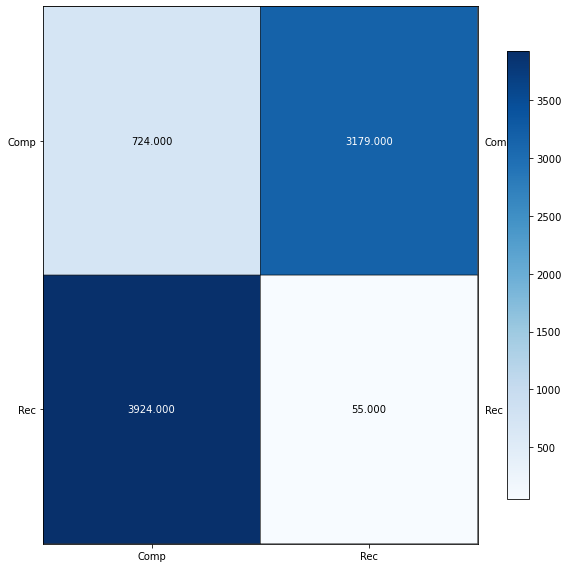

In [6]:
plot_mat(contingency_matrix(labels,km.labels_),size=(8,8),xticklabels = ['Comp','Rec'],yticklabels = ['Comp','Rec'])

Q2: Report the contingency table of your clustering result. You may use
the provided plotmat.py to visualize the matrix. Does the contingency matrix have to
be square-shaped?

The plot is shown above. The shape has not to be square-shaped. It may be flat or tall.  The numbers of class and cluster generated in row and column might not be the same, specifically the length might be different. Sometimes you may come up with many clusters, comparing with a few classes.

# Question 3

In [7]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

In [8]:
print("The homogeneity score is:", homogeneity_score(labels, km.labels_))
print("The completeness_score score is:", completeness_score(labels, km.labels_))
print("The V-measure score is:", v_measure_score(labels, km.labels_))
print("The adjusted Rand Index score is:", adjusted_rand_score(labels, km.labels_))
print("The adjusted mutual information score is:", adjusted_mutual_info_score(labels, km.labels_))

The homogeneity score is: 0.5809557696057134
The completeness_score score is: 0.5948001867166814
The V-measure score is: 0.5877964697988065
The adjusted Rand Index score is: 0.6436957246204892
The adjusted mutual information score is: 0.587758287733538


Q3: Report the 5 clustering measures explained in the introduction for Kmeans
clustering.

Shown above

# Question 4

Text(0.5, 0, 'Value of r')

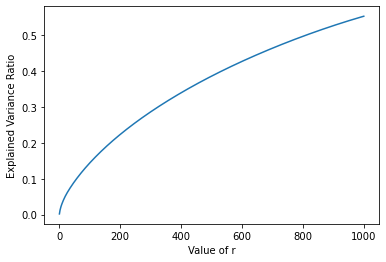

In [9]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000, random_state=0)
LSI = svd.fit_transform(data_tfidf)

x = np.array(range(1, 1001))
ratio = svd.explained_variance_ratio_.cumsum()
plt.plot(x, ratio)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Value of r')


Q4: Report the plot of the percentage of variance that the top r principle
components retain v.s. r, for r = 1 to 1000.

Shown above.

# Question 5

In [10]:
from sklearn.decomposition import NMF
import umap.umap_ as umap

def plot_all(reducer, rs, km, data_tfidf, labels):
    hs,cs,vs,aris,amis = [],[],[],[],[]
    for r in rs:
        if reducer == 'svd':
            svd = TruncatedSVD(n_components=r, random_state=0)
            data_r = svd.fit_transform(data_tfidf)
        elif reducer == 'nmf':
            # max_iter = 500
            nmf = NMF(n_components=r, max_iter = 500, random_state=0)
            data_r = nmf.fit_transform(data_tfidf)
        elif reducer == 'euc':
            euc = umap.UMAP(n_components=r, metric='euclidean', random_state=0)
            data_r = euc.fit_transform(data_tfidf)
        elif reducer == 'cos':
            cos = umap.UMAP(n_components=r, metric='cosine', random_state=0)
            data_r = cos.fit_transform(data_tfidf)
    
        km_fit = km.fit(data_r)
        hs.append(homogeneity_score(labels,km_fit.labels_))
        cs.append(completeness_score(labels,km_fit.labels_))
        vs.append(v_measure_score(labels,km_fit.labels_))
        aris.append(adjusted_rand_score(labels,km_fit.labels_))
        amis.append(adjusted_mutual_info_score(labels,km_fit.labels_))
    
    plt.plot(rs, hs, marker="o")
    plt.plot(rs, cs, marker="o")
    plt.plot(rs, vs, marker="o")
    plt.plot(rs, aris, marker="o")
    plt.plot(rs, amis, marker="o")
    plt.title('5 scores on {}'.format(reducer.upper()))
    plt.xlabel('Value of R')
    plt.ylabel('Scores')
    plt.legend(labels = ['homogeneity','completeness', 'V_measure','Adjsuted rand','Adjusted mutual'])

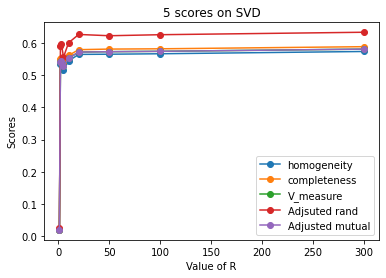

In [11]:
rs = [1, 2, 3, 5, 10, 20, 50, 100, 300]
plot_all('svd', rs, km, data_tfidf, labels)

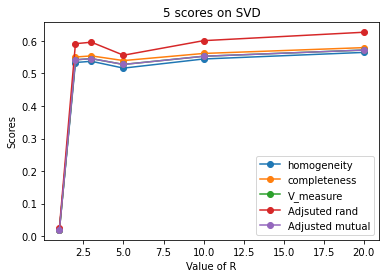

In [12]:
plot_all('svd', rs[:6], km, data_tfidf, labels)

r = 20 is a good choice for SVD

Time to run code: 1061.7041177749634


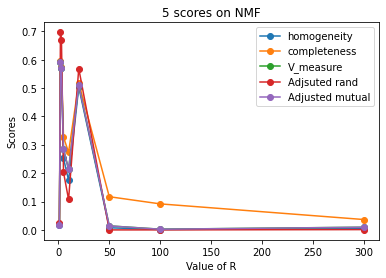

In [13]:
import time

time_start =time.time()
plot_all('nmf', rs, km, data_tfidf, labels)
print('Time to run code: {}'.format(time.time()-time_start))

Time to run code: 11.930792331695557


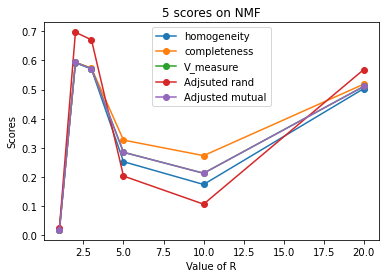

In [14]:
time_start =time.time()
plot_all('nmf', rs[:6], km, data_tfidf, labels)
print('Time to run code: {}'.format(time.time()-time_start))

r = 2 is a good choice for NMF

Q5 Report a good choice of r for SVD and NMF respectively.

From the aboved plots, 
r = 20 is a good choice for SVD
r = 2 is a good choice for NMF




# Question 6 

Q6: How do you explain the non-monotonic behavior of the measures as r increases?

When used for topic modeling in natural language processing, n_components (r) can be used as the number of topics to print out. They will try to retain the principal components, namely features, while reducing the dimension of features to some extent. However, in this case, the relation between dimension r and K-means results are non-monotonic. When r is too small, the vector can only keep little information(features) of original data, so the results won't be good; On the other hand when r is too large, the noisy feature matrix will degrade K-means clustering performance, and the data are in a high-dimensional space so that the Euclidean distance is not a good metric. The linear dimension reduction effect like PCA and NMF will be relatively simple in this case because the data itself may be embedded in the manifold in a high-dimensional space.

# Question 7

In [15]:
rs = [1, 2, 3, 5, 10, 20, 50, 100, 300]

import statistics
def compute_average(reducer, rs, km, data_tfidf, labels):
    hs,cs,vs,aris,amis = [],[],[],[],[]
    for r in rs:
        if reducer == 'svd':
            svd = TruncatedSVD(n_components=r, random_state=0)
            data_r = svd.fit_transform(data_tfidf)
        elif reducer == 'nmf':
            nmf = NMF(n_components=r, max_iter = 500, random_state=0)
            data_r = nmf.fit_transform(data_tfidf)
            
        km.fit(data_r)    
        hs.append(homogeneity_score(labels,km.labels_))
        cs.append(completeness_score(labels,km.labels_))
        vs.append(v_measure_score(labels,km.labels_))
        aris.append(adjusted_rand_score(labels,km.labels_))
        amis.append(adjusted_mutual_info_score(labels,km.labels_))
            
    print("The mean homogeneity score of {} is: {}".format(reducer.upper(), statistics.mean(hs)))
    print("The mean completeness_score of {} score is: {}".format(reducer.upper(), statistics.mean(cs)))
    print("The mean V-measure score of {} is: {}".format(reducer.upper(), statistics.mean(vs)))
    print("The mean adjusted Rand Index score of {} is: {}".format(reducer.upper(), statistics.mean(aris)))
    print("The mean adjusted mutual information score of {} is: {}".format(reducer.upper(), statistics.mean(amis)))
    #('5 scores on {}'.format('SVD'))

        
        

In [16]:
time_start =time.time()

#SVD 
compute_average('svd', rs, km, data_tfidf, labels)
print('\n')
#NMF
compute_average('nmf', rs, km, data_tfidf, labels)
print('\n')
print('Time to run code: {}'.format(time.time()-time_start))




The mean homogeneity score of SVD is: 0.49130160645561705
The mean completeness_score of SVD score is: 0.5063017751099483
The mean V-measure score of SVD is: 0.4986851154350201
The mean adjusted Rand Index score of SVD is: 0.5421750392980184
The mean adjusted mutual information score of SVD is: 0.49863858271416794


The mean homogeneity score of NMF is: 0.23640561724554449
The mean completeness_score of NMF score is: 0.28351592127322395
The mean V-measure score of NMF is: 0.24670292234205082
The mean adjusted Rand Index score of NMF is: 0.2527153641303994
The mean adjusted mutual information score of NMF is: 0.24660352778375802


Time to run code: 1078.2093074321747


Q7: Are these measures on average better than those computed in Question
3?

They are not. r=1 for both models lower the arerage score.


# Question 8

The homogeneity score is: 0.5647412437625056
The completeness_score score is: 0.5794065024081754
The V-measure score is: 0.5719798861802995
The adjusted Rand Index score is: 0.6267059318664945
The adjusted mutual information score is: 0.57194019814461


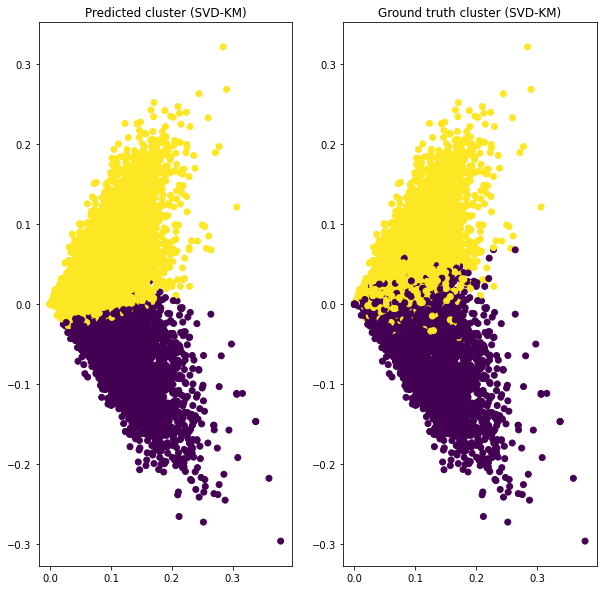

In [17]:
# SVD r = 20
svd_best = TruncatedSVD(n_components=20, random_state=0)
data_svd_best = svd_best.fit_transform(data_tfidf)

plt.figure(figsize=(10, 10))
km.fit(data_svd_best)
plt.subplot(121)
plt.scatter(data_svd_best[:, 0], data_svd_best[:, 1], c=km.labels_)
plt.title("Predicted cluster (SVD-KM)")

plt.subplot(122)
plt.scatter(data_svd_best[:, 0], data_svd_best[:, 1], c=labels)
plt.title("Ground truth cluster (SVD-KM)")

print("The homogeneity score is:", homogeneity_score(labels, km.labels_))
print("The completeness_score score is:", completeness_score(labels, km.labels_))
print("The V-measure score is:", v_measure_score(labels, km.labels_))
print("The adjusted Rand Index score is:", adjusted_rand_score(labels, km.labels_))
print("The adjusted mutual information score is:", adjusted_mutual_info_score(labels, km.labels_))

The homogeneity score is: 0.5924736270587376
The completeness_score score is: 0.5939066206393134
The V-measure score is: 0.5931892584137631
The adjusted Rand Index score is: 0.6968751544445039
The adjusted mutual information score is: 0.5931519697549142


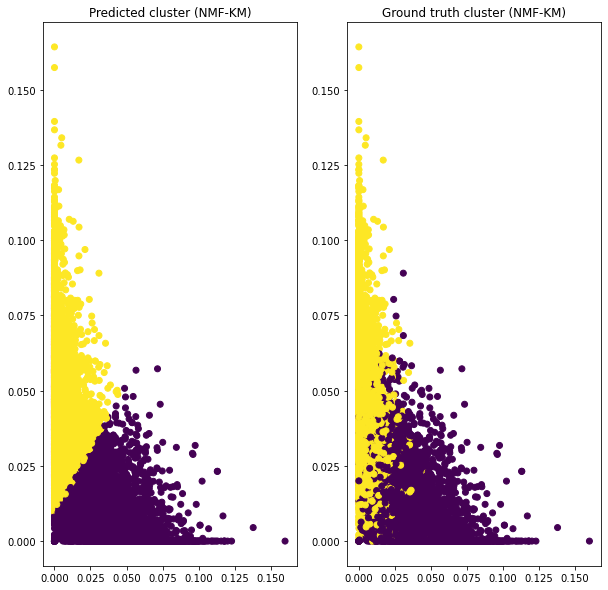

In [18]:
# NMF r = 2
nmf_best = NMF(n_components=2, random_state=0)
data_nmf_best = nmf_best.fit_transform(data_tfidf)

plt.figure(figsize=(10, 10))
km.fit(data_nmf_best)
plt.subplot(121)
plt.scatter(data_nmf_best[:, 0], data_nmf_best[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF-KM)")

plt.subplot(122)
plt.scatter(data_nmf_best[:, 0], data_nmf_best[:, 1], c=labels)
plt.title("Ground truth cluster (NMF-KM)")

print("The homogeneity score is:", homogeneity_score(labels, km.labels_))
print("The completeness_score score is:", completeness_score(labels, km.labels_))
print("The V-measure score is:", v_measure_score(labels, km.labels_))
print("The adjusted Rand Index score is:", adjusted_rand_score(labels, km.labels_))
print("The adjusted mutual information score is:", adjusted_mutual_info_score(labels, km.labels_))

Q8: Visualize the clustering results:
        
They are shown above

# Question 9

Q9: What do you observe in the visualization? How are the data points of the
two classes distributed? Is distribution of the data ideal for K-Means clustering?

We are projecting the data vectors onto 2D dimensional plot. For both SVD and NMF, we got a simliar plot of predicted cluster and ground-truth cluster. Two clusters in both cases are in up and down but not in spherical. They  are close together and some boundaries are overlapping with each other. This is beacuse the centroids are closed to each other. Besides we can see that there are some outliers and noisy vertors cases for the predicted clusters. Certainly, KM clustering is not ideal for both cases.

# Question 10

In [19]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 
               'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 
               'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
               'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 
               'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 
               'talk.politics.misc', 'talk.religion.misc']

data_all = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=0,remove=('headers','footers'))
vectorizer = CountVectorizer(stop_words='english', min_df=3)
tfidf = TfidfTransformer()
data_all_vec = vectorizer.fit_transform(data_all.data)
data_all_tfidf = tfidf.fit_transform(data_all_vec)
print("train count size ", data_all_tfidf.shape)



train count size  (18846, 45365)


Time to run code: 498.76230669021606


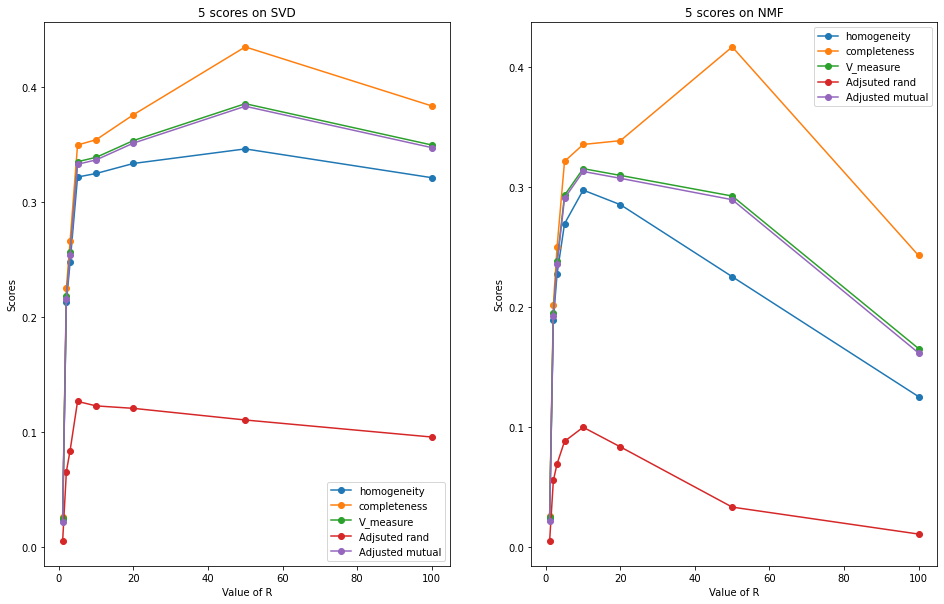

In [20]:
# Finding the best parameter from SVD and NMF
# The list of r has been shorten after testing from the orginal candiates in order to save time and memory.

time_start =time.time()
rs = [1, 2, 3, 5, 10, 20, 50, 100]
km = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
plt.figure(figsize=(16, 10))
plt.subplot(121)
plot_all('svd', rs, km, data_all_tfidf, data_all.target)
plt.subplot(122)
plot_all('nmf', rs, km, data_all_tfidf, data_all.target)

print('Time to run code: {}'.format(time.time()-time_start))



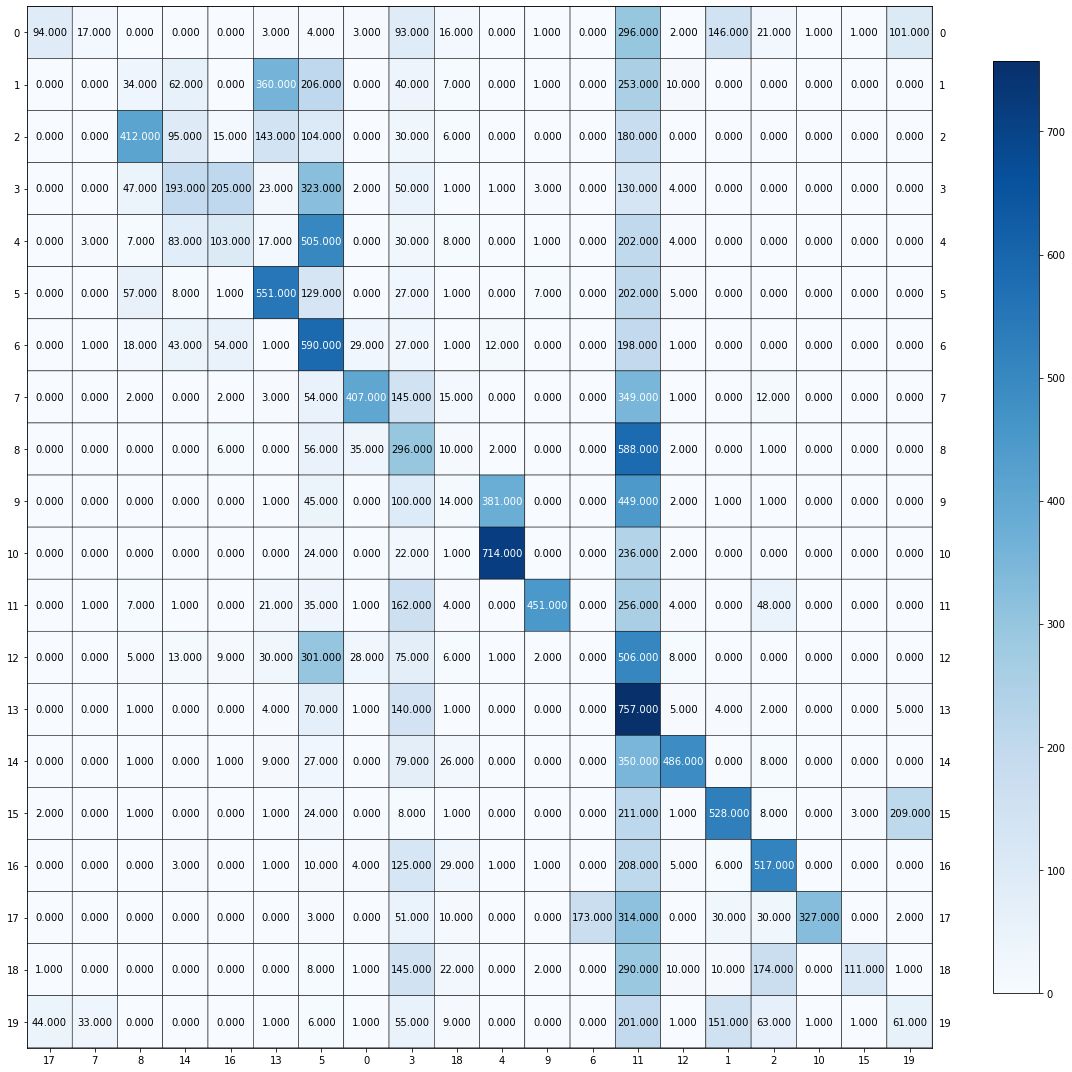

The homogeneity score is: 0.3458766189788096
The completeness_score score is: 0.43446715637092265
The V-measure score is: 0.38514315318415665
The adjusted Rand Index score is: 0.11042604980495854
The adjusted mutual information score is: 0.38290635686500557


In [21]:
# Best r for SVD is 50
# Best r for NMF is 50
# I will manually choose SVD = 50 here since it scores better.

km = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
svd_Q10 = TruncatedSVD(n_components=50, random_state=0)
data_Q10_r = svd_Q10.fit_transform(data_all_tfidf)
km_svd = km.fit(data_Q10_r)

cm = confusion_matrix(data_all.target, km_svd.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], size=(15,15), xticklabels=cols, yticklabels=rows)

print("The homogeneity score is:", homogeneity_score(data_all.target, km_svd.labels_))
print("The completeness_score score is:", completeness_score(data_all.target, km_svd.labels_))
print("The V-measure score is:", v_measure_score(data_all.target, km_svd.labels_))
print("The adjusted Rand Index score is:", adjusted_rand_score(data_all.target, km_svd.labels_))
print("The adjusted mutual information score is:", adjusted_mutual_info_score(data_all.target, km_svd.labels_))

Q10: Load documents with the same configuration as in Question 1, but for ALL
20 categories.

Results are shown above.

# Question 11

C:\Users\ericz\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Time to run code: 1096.986167192459


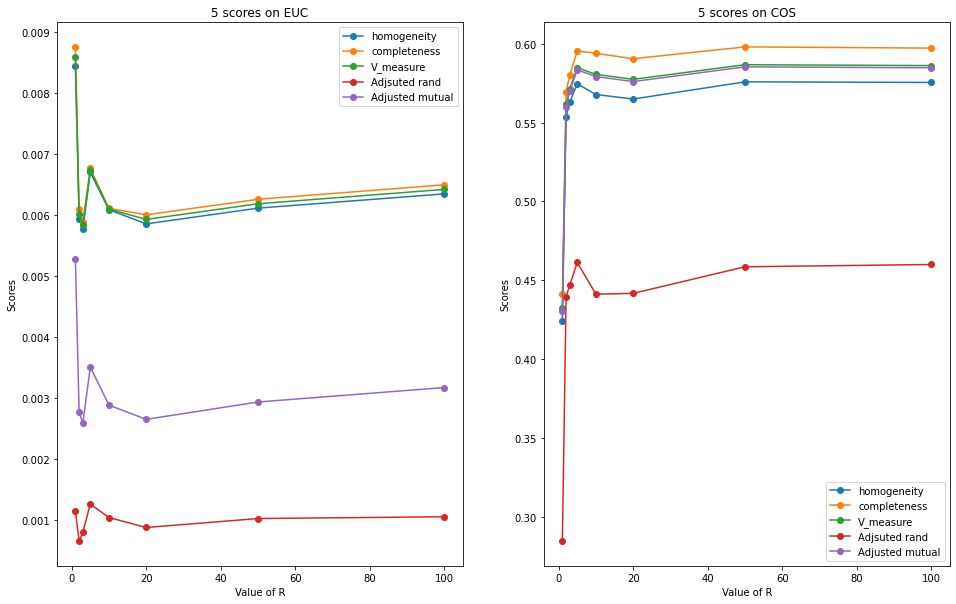

In [22]:
# The list of r has been shorten after testing from the orginal candiates in order to save time and memory.

import umap.umap_ as umap
time_start =time.time()
rs = [1, 2, 3, 5, 10, 20, 50, 100]
km = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
plt.figure(figsize=(16, 10))
plt.subplot(121)
plot_all('euc', rs, km, data_all_tfidf, data_all.target)
plt.subplot(122)
plot_all('cos', rs, km, data_all_tfidf, data_all.target)

print('Time to run code: {}'.format(time.time()-time_start))

Best r for euc is 1.

Best r for cos is 5.

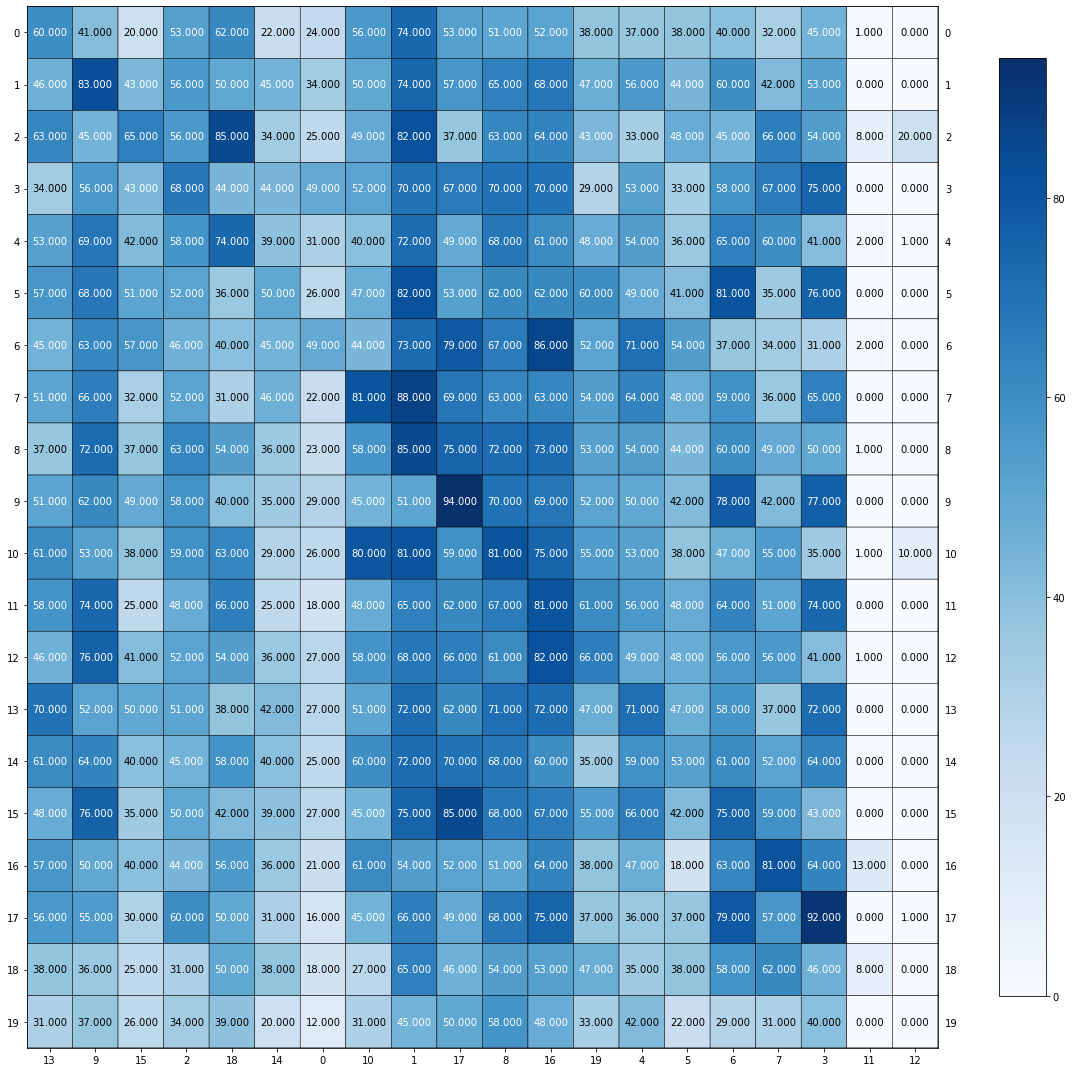

The best homogeneity score of euclidean UMAP is: 0.008439885594414933
The best completeness_score score of euclidean UMAP is: 0.00875331790859357
The best V-measure score of euclidean UMAP is: 0.008593744814006996
The best adjusted Rand Index of euclidean UMAP score is: 0.0011433719078007228
The best adjusted mutual information of euclidean UMAP score is: 0.00528385445413727


In [23]:
km = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)

euc_Q11 = umap.UMAP(n_components=1, metric='euclidean', random_state=0)
data_Q11_euc_r = euc_Q11.fit_transform(data_all_tfidf)
km_euc = km.fit(data_Q11_euc_r)
cm = confusion_matrix(data_all.target, km_euc.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], size=(15,15), xticklabels=cols, yticklabels=rows)

print("The best homogeneity score of euclidean UMAP is:", homogeneity_score(data_all.target, km_euc.labels_))
print("The best completeness_score score of euclidean UMAP is:", completeness_score(data_all.target, km_euc.labels_))
print("The best V-measure score of euclidean UMAP is:", v_measure_score(data_all.target, km_euc.labels_))
print("The best adjusted Rand Index of euclidean UMAP score is:", adjusted_rand_score(data_all.target, km_euc.labels_))
print("The best adjusted mutual information of euclidean UMAP score is:", adjusted_mutual_info_score(data_all.target, km_euc.labels_))

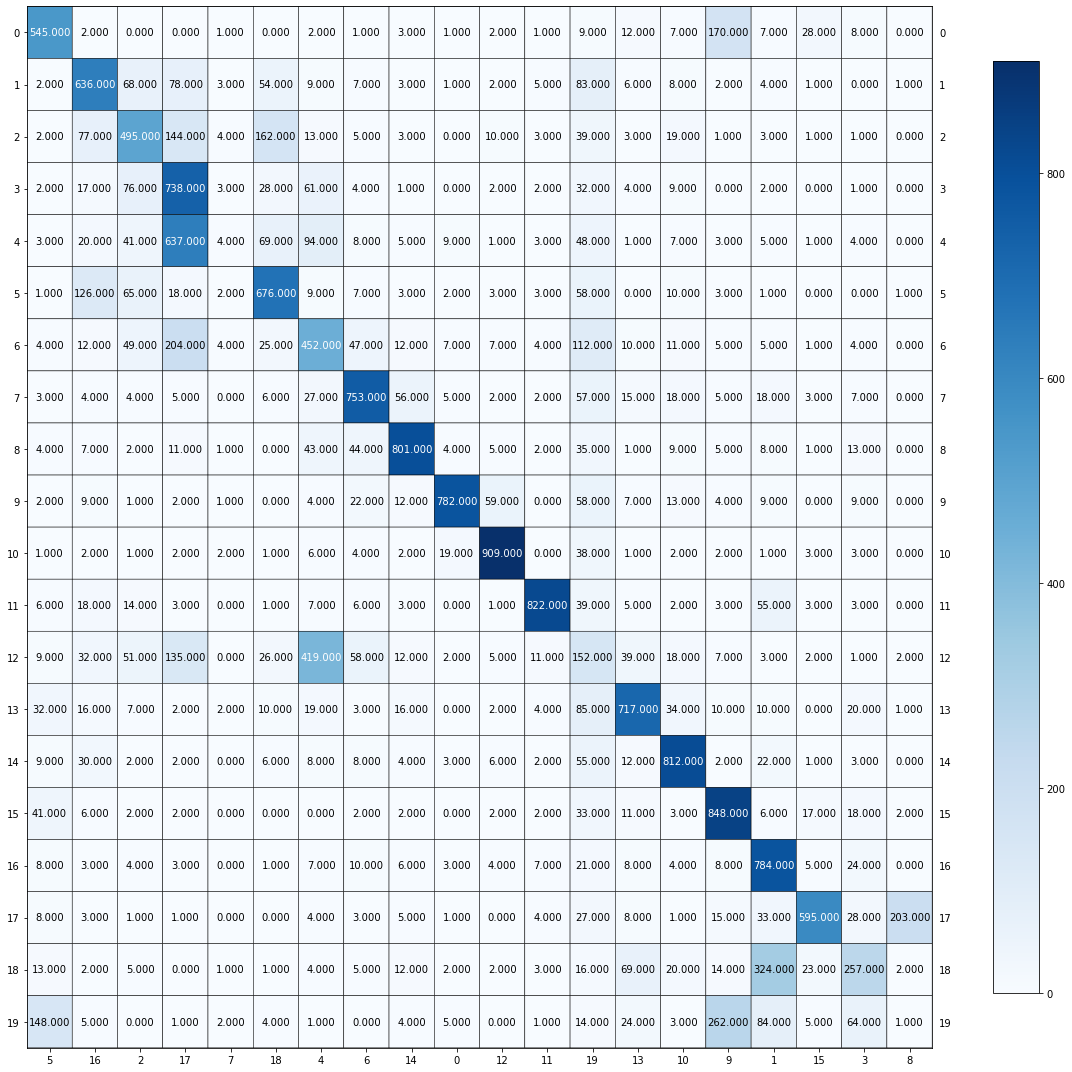

The best homogeneity score of cosine UMAP is: 0.5745590392752127
The best completeness_score score of cosine UMAP is: 0.5955010889932821
The best V-measure score of cosine UMAP is: 0.5848426509253882
The best adjusted Rand Index of cosine UMAP score is: 0.46123389571290613
The best adjusted mutual information of cosine UMAP score is: 0.5834663368427103


In [24]:
#r = 5

cos_Q11 = umap.UMAP(n_components=5, metric='cosine', random_state=0)
data_Q11_cos_r = cos_Q11.fit_transform(data_all_tfidf)
km_cos = km.fit(data_Q11_cos_r)
cm = confusion_matrix(data_all.target, km_cos.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], size=(15,15), xticklabels=cols, yticklabels=rows)

print("The best homogeneity score of cosine UMAP is:", homogeneity_score(data_all.target, km_cos.labels_))
print("The best completeness_score score of cosine UMAP is:", completeness_score(data_all.target, km_cos.labels_))
print("The best V-measure score of cosine UMAP is:", v_measure_score(data_all.target, km_cos.labels_))
print("The best adjusted Rand Index of cosine UMAP score is:", adjusted_rand_score(data_all.target, km_cos.labels_))
print("The best adjusted mutual information of cosine UMAP score is:", adjusted_mutual_info_score(data_all.target, km_cos.labels_))

Q11 Use UMAP to reduce the dimensionality of the 20 category TF-IDF matrix,
and apply K-Means clustering with n_components=20 .

Results for both metric="euclidean" and metric="cosine" are shown below. After validated, Cosine performs much better than euclidean.

# Question 12

Q12: Analyze the contingency matrix.

For euclidean, We can't see any pattern from the plot. There is no clear feature for the diagonal line, which indicates that this clusterer/ parameter performs poorly. The 5 clustering metrics values demonstrated this observation.

For cosine, we can definitely see a clear diagonal line, which indicates that there is a 'match' of the feature between corresponding rows and columns. While the values on diagonal are mainly around 600-800, the off-diagonal values are sometimes in unit digits. However, there are still mismatch elements lying beyond the diagonal, for example in column 12 and row 4. The off-diagonal elements contain the real information in most situations, and they are affecting the overall accuracy.

# Question 13

Q13: So far, we have attempted K-Means clustering with 4 different representation
learning techniques (sparse representation, PCA, NMF, UMAP). Compare and contrast the results
from the previous sections, and discuss which approach is best for the K-Means clustering task on
the 20-class text data.

UMAP (with metric="cosine" ) is the best so far. The second best is SVD(n_components=50) and I assume that NMF is better than sparse representation. 

For UMAP, it has got 
homogeneity score of cosine UMAP: 0.5745590392752127
completeness_score score of cosine UMAP: 0.5955010889932821
V-measure score of cosine UMAP: 0.5848426509253882
adjusted Rand Index of cosine UMAP score: 0.46123389571290613
adjusted mutual information of cosine UMAP score: 0.5834663368427103

UMAP performs better in cosine. This is expected since cosine similarity is not affected by the magnitude of the vectors, meaning that the length of the documents does not affect the distance metric, whereas Euclidean distance might fail. UMAP is performing better than PCA and NMF. It is also reasonable because UMAP is a nonlinear dimensionality reduction method so that it is very effective for visualizing clusters.

# Question 14

In [25]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=20, linkage='ward')
ward_cos = ward.fit(data_Q11_cos_r)
print("The Homogeneity score of Agglomerative Clustering Ward is:", homogeneity_score(data_all.target, ward_cos.labels_))
print("The Completeness score of Agglomerative Clustering Ward is:", completeness_score(data_all.target, ward_cos.labels_))
print("The V-measure score of Agglomerative Clustering Ward is:", v_measure_score(data_all.target, ward_cos.labels_))
print("The adjusted rand-index score of Agglomerative Clustering Ward is:", adjusted_rand_score(data_all.target, ward_cos.labels_))
print("The adjusted mutual information score of Agglomerative Clustering Ward is:", adjusted_mutual_info_score(data_all.target, ward_cos.labels_))
print('\n')

single = AgglomerativeClustering(n_clusters=20, linkage='single')
single_cos = single.fit(data_Q11_cos_r)
print("The Homogeneity score of Agglomerative Clustering Single is:", homogeneity_score(data_all.target, single_cos.labels_))
print("The Completeness score of Agglomerative Clustering Single is:", completeness_score(data_all.target, single_cos.labels_))
print("The V-measure score of Agglomerative Clustering Single is:", v_measure_score(data_all.target, single_cos.labels_))
print("The adjusted rand-index score of Agglomerative Clustering Single is:", adjusted_rand_score(data_all.target, single_cos.labels_))
print("The adjusted mutual information score of Agglomerative Clustering Single is:", adjusted_mutual_info_score(data_all.target, single_cos.labels_))

The Homogeneity score of Agglomerative Clustering Ward is: 0.5558505524517964
The Completeness score of Agglomerative Clustering Ward is: 0.5787912934094087
The V-measure score of Agglomerative Clustering Ward is: 0.5670890093987669
The adjusted rand-index score of Agglomerative Clustering Ward is: 0.42957297903960145
The adjusted mutual information score of Agglomerative Clustering Ward is: 0.565650345747001


The Homogeneity score of Agglomerative Clustering Single is: 0.016239031063543
The Completeness score of Agglomerative Clustering Single is: 0.37270757888720096
The V-measure score of Agglomerative Clustering Single is: 0.031122060438750886
The adjusted rand-index score of Agglomerative Clustering Single is: 0.0004904152230090023
The adjusted mutual information score of Agglomerative Clustering Single is: 0.026331606809285767


Q14: Use UMAP to reduce the dimensionality properly, and perform Agglomerative
clustering

Results are shown above.

# Question 15

In [26]:
#DBSCAN
from sklearn.cluster import DBSCAN
import hdbscan
UMAP_cos = data_Q11_cos_r
DBSCAN_ = DBSCAN(eps=0.5)
result_DBSCAN = DBSCAN_.fit_predict(UMAP_cos)
print("The Homogeneity score of DBSCAN is:", homogeneity_score(data_all.target, result_DBSCAN))
print("The Completeness score of DBSCAN  is:", completeness_score(data_all.target, result_DBSCAN))
print("The V-measure score of DBSCAN  is:", v_measure_score(data_all.target, result_DBSCAN))
print("The adjusted rand-index score of DBSCAN  is:", adjusted_rand_score(data_all.target, result_DBSCAN))
print("The adjusted mutual information score of DBSCAN is:", adjusted_mutual_info_score(data_all.target, result_DBSCAN))
print('\n')

#HDBSCAN
HDBSCAN_ = hdbscan.HDBSCAN(min_cluster_size=100)
result_HDBSCAN = HDBSCAN_.fit_predict(UMAP_cos)
print("The Homogeneity score of HDBSCAN is:", homogeneity_score(data_all.target, result_HDBSCAN))
print("The Completeness score of HDBSCAN is:", completeness_score(data_all.target, result_HDBSCAN))
print("The V-measure score of HDBSCAN is:", v_measure_score(data_all.target, result_HDBSCAN))
print("The adjusted rand-index score of HDBSCAN is:", adjusted_rand_score(data_all.target, result_HDBSCAN))
print("The adjusted mutual information score of HDBSCAN is:", adjusted_mutual_info_score(data_all.target, result_HDBSCAN))



The Homogeneity score of DBSCAN is: 0.017867202020543514
The Completeness score of DBSCAN  is: 0.3401863022760621
The V-measure score of DBSCAN  is: 0.033951224129637456
The adjusted rand-index score of DBSCAN  is: 0.0004932472884334998
The adjusted mutual information score of DBSCAN is: 0.028420528796731015


The Homogeneity score of HDBSCAN is: 0.4105371229231406
The Completeness score of HDBSCAN is: 0.6176158762091551
The V-measure score of HDBSCAN is: 0.493222789029545
The adjusted rand-index score of HDBSCAN is: 0.22281678126108806
The adjusted mutual information score of HDBSCAN is: 0.49229296936230066


Q15: Apply DBSCAN and HDBSCAN on UMAP-transformed 20-category data. Use min_cluster_size=100

Results are shown above

# Question 16

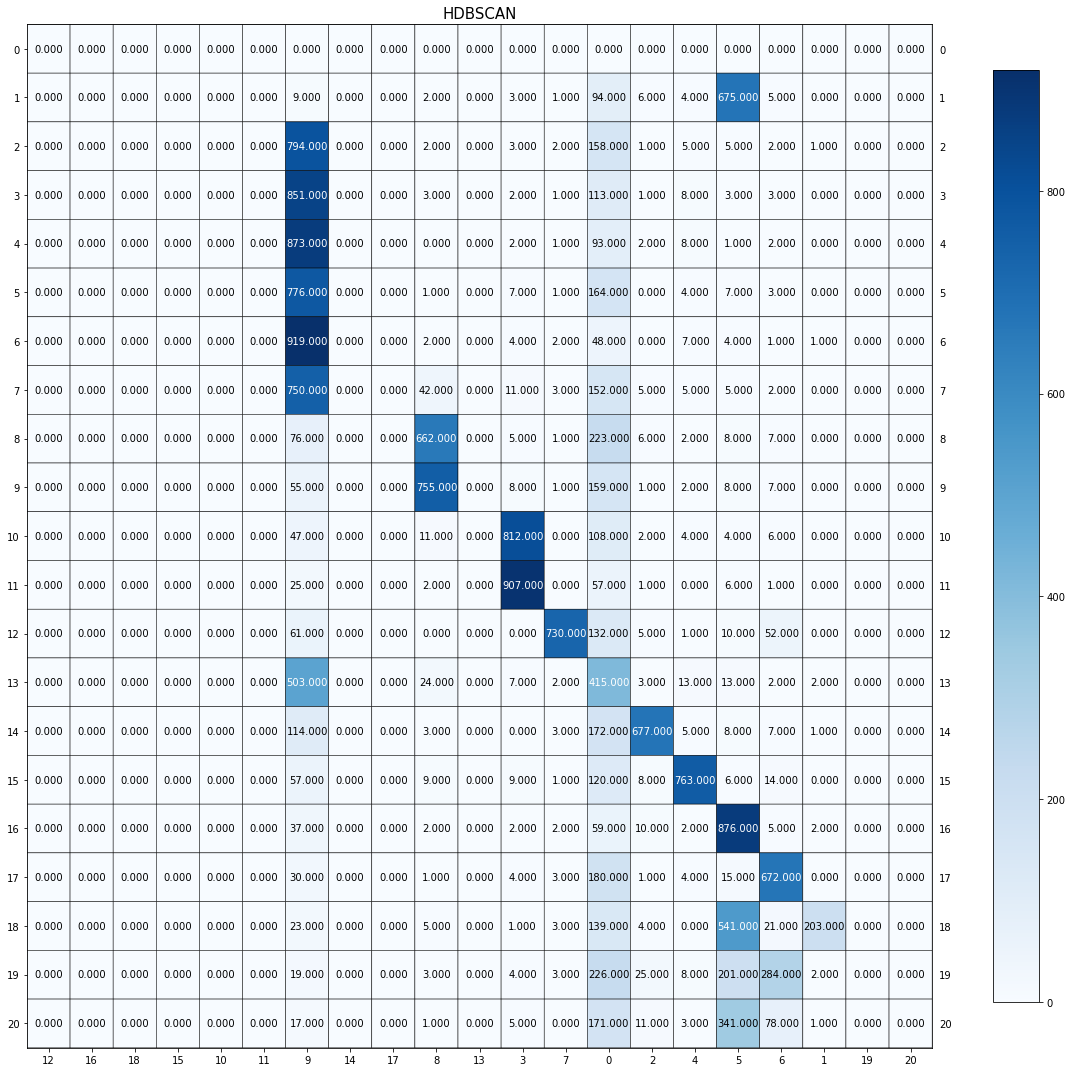

In [27]:
#HDBSCAN performs better

HDBSCAN_ = hdbscan.HDBSCAN(min_cluster_size=100)
result_HDBSCAN = HDBSCAN_.fit_predict(UMAP_cos)
cm = confusion_matrix(data_all.target, result_HDBSCAN)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], size=(15,15), xticklabels=cols, yticklabels=rows, title = 'HDBSCAN')

Q16 How many clusters are given by the model? What does “-1” mean for the clustering labels?

There are 10 clusters with values given by the model. There are a few ground truth clusters with value of 0. "-1" is the outlier or noise sample that have not been classified into the table. HDBSCAN are trying to find outlier, in which K-means can not identify.

# Question 17

In [28]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from joblib import Memory
from shutil import rmtree

svd_5 = TruncatedSVD(n_components=5, random_state=0)
svd_20 = TruncatedSVD(n_components=20, random_state=0)
svd_200 = TruncatedSVD(n_components=200, random_state=0)
nmf_5 = NMF(n_components=5, max_iter = 500, random_state=0)
nmf_20 = NMF(n_components=20, max_iter = 500, random_state=0)
nmf_200 = NMF(n_components=200, max_iter = 500, random_state=0)
umap_cos_5 = umap.UMAP(n_components=5, metric='cosine', random_state=0)
umap_cos_20 = umap.UMAP(n_components=20, metric='cosine', random_state=0)
umap_cos_200 = umap.UMAP(n_components=200, metric='cosine', random_state=0)

km_10 = KMeans(n_clusters=10, random_state=0)
km_20 = KMeans(n_clusters=20, random_state=0)
km_50 = KMeans(n_clusters=50, random_state=0)
agg_ward_20 = AgglomerativeClustering(n_clusters=20)
DBSCAN_05 = DBSCAN(eps=0.5, n_jobs=-1)
DBSCAN_5 = DBSCAN(eps=5, n_jobs=-1)
HDBSCAN_100 = hdbscan.HDBSCAN(min_cluster_size=100, core_dist_n_jobs=-1)
HDBSCAN_200 = hdbscan.HDBSCAN(min_cluster_size=200, core_dist_n_jobs=-1)

dic = {
    'km10' : km_10,
    'km20' : km_20,
    'km50' : km_50,
    'agg_ward20' : agg_ward_20,
    'DBSCAN0.5' : DBSCAN_05,
    'DBSCAN5' : DBSCAN_5,
    'HDBSCAN100' : HDBSCAN_100,
    'HDBSCAN200' : HDBSCAN_200
    }
clustererlist = ['km10', 'km20', 'km50', 'agg_ward20','DBSCAN0.5', 'DBSCAN5', 'HDBSCAN100', 'HDBSCAN200']
lst = ['None', 'svd5', 'svd20', 'svd200', 'nmf5', 'nmf20', 'nmf200', 'umap5', 'umap20', 'umap200']

def pip_Q17(name):
    
    cachedir = mkdtemp()
    memory = Memory(location=cachedir, verbose=False)

    if name not in dic:
        return print('wrong name')
    clusterer_name = dic[name]
    
    preprocessors = [('none', None), ('svd5', svd_5),('svd20', svd_20), ('svd200', svd_200), ('nmf5', nmf_5), ('nmf20', nmf_20), ('nmf200', nmf_200), 
     ('umap5', umap_cos_5), ('umap20', umap_cos_20), ('umap200', umap_cos_200)]

    clusterer = Pipeline([
    (name, clusterer_name,),]
    )
    
    #, memory=memory
    
    # None is not applicable for Agglomerative Clustering
    if name == 'agg_ward20':
        for i in range(len(preprocessors)-1):
            preprocessor_ = preprocessors[i+1]
            preprocessor  = Pipeline([
            preprocessor_]
            )
            pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer),])
            pipe.fit(data_all_tfidf)
            labels = pipe["clusterer"][name].labels_
            print("The adjusted Rand Index score for {} - {} is: {}".format(lst[i+1], name, adjusted_rand_score(data_all.target, labels)))
    else:
        for i in range(len(preprocessors)):
            preprocessor_ = preprocessors[i]
            preprocessor  = Pipeline([
            preprocessor_]
            )
            pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer),])
            pipe.fit(data_all_tfidf)
            labels = pipe["clusterer"][name].labels_
            print("The adjusted Rand Index score for {} - {} is: {}".format(lst[i], name, adjusted_rand_score(data_all.target, labels)))
        
    rmtree(cachedir)

In [29]:
import time

time_start =time.time()
for clusterer in clustererlist:
    pip_Q17(clusterer)
    print('\n')
    
print('Time to run code: {}'.format(time.time()-time_start))   

The adjusted Rand Index score for None - km10 is: 0.10646082402966119
The adjusted Rand Index score for svd5 - km10 is: 0.104221694092446
The adjusted Rand Index score for svd20 - km10 is: 0.09345420336584254
The adjusted Rand Index score for svd200 - km10 is: 0.0918968655587027
The adjusted Rand Index score for nmf5 - km10 is: 0.0734015603795355
The adjusted Rand Index score for nmf20 - km10 is: 0.04298470526752116
The adjusted Rand Index score for nmf200 - km10 is: 0.008292090489404729
The adjusted Rand Index score for umap5 - km10 is: 0.33589654423963794
The adjusted Rand Index score for umap20 - km10 is: 0.3316531937559566
The adjusted Rand Index score for umap200 - km10 is: 0.3310964506148273


The adjusted Rand Index score for None - km20 is: 0.12216280815908323
The adjusted Rand Index score for svd5 - km20 is: 0.1264208062507061
The adjusted Rand Index score for svd20 - km20 is: 0.11418718267997306
The adjusted Rand Index score for svd200 - km20 is: 0.1062183531841657
The adjust

Q17: Based on your experiments, which dimensionality reduction technique and clustering
methods worked best together for 20-class text data and why?

reducer: UMAP5 clusterer: KMeans20 works the best, with a highest adjusted Rand Index score of 0.4426323455482683. 

As the project instruction for Q17 states, we are only given limited parameter choices for each model, so I decide not to experiment on other parameters for each model besides the required parameters. UMAP is an exception, in which I use metric='cosine' since I have already figured out that it performs way better than the euclidean metric.

UMAP uses graph layout algorithms to arrange data in low-dimensional space. In the simplest sense, UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible. it is a nonlinear dimensionality reduction method, so that it might work better than PCA and it is very effective for visualizing clusters or groups of data points and their relative proximities. K-means can easily locate centroid and it can scale up for large amount of data. 

# Question 18

In [30]:
#pip install ivis[cpu]

In [31]:
# from ivis import Ivis
# from sklearn.preprocessing import MinMaxScaler

# model1 = Ivis(embedding_dims=2, k=15)
# model2 = Ivis(embedding_dims=10, k=15)
# model3 = Ivis(embedding_dims=20, k=15)
# model4 = Ivis(embedding_dims=2, k=50)
# model5 = Ivis(embedding_dims=10, k=50)
# model6 = Ivis(embedding_dims=20, k=50)

# km_10 = KMeans(n_clusters=10, random_state=0)
# km_20 = KMeans(n_clusters=20, random_state=0)
# km_50 = KMeans(n_clusters=50, random_state=0)
# agg_ward_20 = AgglomerativeClustering(n_clusters=20)
# DBSCAN_05 = DBSCAN(eps=0.5, n_jobs=-1)
# DBSCAN_5 = DBSCAN(eps=5, n_jobs=-1)
# HDBSCAN_100 = hdbscan.HDBSCAN(min_cluster_size=100, core_dist_n_jobs=-1)
# HDBSCAN_200 = hdbscan.HDBSCAN(min_cluster_size=200, core_dist_n_jobs=-1)

# dic = {
#     'km10' : km_10,
#     'km20' : km_20,
#     'km50' : km_50,
#     'agg_ward20' : agg_ward_20,
#     'DBSCAN0.5' : DBSCAN_05,
#     'DBSCAN5' : DBSCAN_5,
#     'HDBSCAN100' : HDBSCAN_100,
#     'HDBSCAN200' : HDBSCAN_200
#     }
# clustererlist = ['km10', 'km20', 'km50', 'agg_ward20','DBSCAN0.5', 'DBSCAN5', 'HDBSCAN100', 'HDBSCAN200']
# lst_Q18 = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6']

# def pip_Q18(name):
    
#     cachedir = mkdtemp()
#     memory = Memory(location=cachedir, verbose=False)

#     if name not in dic:
#         return print('wrong name')
#     clusterer_name = dic[name]
    
#     preprocessors = [('model1',model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5), ('model6', model6)]

#     clusterer = Pipeline([
#     (name, clusterer_name,),]
#     )
    
#     #, memory=memory
    
#     for i in range(len(preprocessors)):
#         preprocessor_ = preprocessors[i]
#         preprocessor  = Pipeline([
#         preprocessor_]
#         )
#         pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer),])
#         data_all_tfidf_scaled = MinMaxScaler().fit_transform(data_all_tfidf)
#         pipe.fit(data_all_tfidf_scaled)
#         labels = pipe["clusterer"][name].labels_
#         print("The adjusted Rand Index score for {} - {} is: {}".format(lst_Q18[i], name, adjusted_rand_score(data_all.target, labels)))
        
#     rmtree(cachedir)

In [32]:
# time_start =time.time()
# for clusterer in clustererlist:
#     pip_Q18(clusterer)
#     print('\n')
    
# print('Time to run code: {}'.format(time.time()-time_start)) 